In [3]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# yolov5 모델 설치 -> github주소를 클론으로 만듬.

%cd /content/drive/MyDrive/Newproject
!git clone https://github.com/ultralytics/yolov5

/content/drive/MyDrive/Newproject
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [7]:
# yolov5 환경 세팅
%cd /content/drive/MyDrive/Newproject/yolov5
!pip install -qr requirements.txt

/content/drive/MyDrive/Newproject/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [8]:
!pwd

/content/drive/MyDrive/Newproject/yolov5


In [ ]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('./project_custom/train/*.jpg') + glob('./project_custom/train/*.JPG')
valid_img_list = glob('./project_custom/val/*.jpg') + glob('./project_custom/val/*.JPG')


# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')

with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
# IPython에서 입력된 내용을 텍스트처럼 계속 사용하기 위해 정의
from IPython.core.magic import register_line_cell_magic

# register_line_cell_magic을 이용해 IPython에서 바로 사용할 수 있게 정의
# writetimplate를 쉽게 사용할 수 있음
@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
import yaml

with open('/content/drive/MyDrive/Newproject/yolov5/data/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/Newproject/yolov5/project_custom/train'
data['val'] = '/content/drive/MyDrive/Newproject/yolov5/project_custom/val'

with open('/content/drive/MyDrive/Newproject/yolov5/data/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['cavity'], 'nc': 1, 'train': '/content/drive/MyDrive/Newproject/yolov5/project_custom/train', 'val': '/content/drive/MyDrive/Newproject/yolov5/project_custom/val'}
{'names': ['cavity'], 'nc': 1, 'train': '/content/drive/MyDrive/Newproject/yolov5/project_custom/train', 'val': '/content/drive/MyDrive/Newproject/yolov5/project_custom/val'}


In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data /content/drive/MyDrive/Newproject/yolov5/data/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name results

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/Newproject/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 3.25 KiB | 70.00 KiB/s, done.
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.

In [9]:
!python detect.py --weights /content/drive/MyDrive/Newproject/yolov5/runs/train/results5/weights/best.pt --img 416 --conf 0.5 --source "/content/drive/MyDrive/Newproject/IMG.JPG"

detect: weights=['/content/drive/MyDrive/Newproject/yolov5/runs/train/results5/weights/best.pt'], source=/content/drive/MyDrive/Newproject/IMG.JPG, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Newproject/IMG.JPG: 416x416 1 cavity, 7.5ms
Speed: 0.5ms pre-process, 7.5ms inference, 40.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp16


In [10]:
!python detect.py --weights /content/drive/MyDrive/Newproject/yolov5/runs/train/results5/weights/best.pt --img 416 --conf 0.5 --source "/content/drive/MyDrive/Newproject/break.jpg"

detect: weights=['/content/drive/MyDrive/Newproject/yolov5/runs/train/results5/weights/best.pt'], source=/content/drive/MyDrive/Newproject/break.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Newproject/break.jpg: 384x416 1 cavity, 92.8ms
Speed: 0.6ms pre-process, 92.8ms inference, 1.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp17


In [12]:
!python detect.py --weights /content/drive/MyDrive/Newproject/yolov5/runs/train/results5/weights/best.pt --img 416 --conf 0.5 --source "/content/drive/MyDrive/Newproject/chage.jpg"

detect: weights=['/content/drive/MyDrive/Newproject/yolov5/runs/train/results5/weights/best.pt'], source=/content/drive/MyDrive/Newproject/chage.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Newproject/chage.jpg: 416x416 (no detections), 46.1ms
Speed: 0.6ms pre-process, 46.1ms inference, 0.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp19


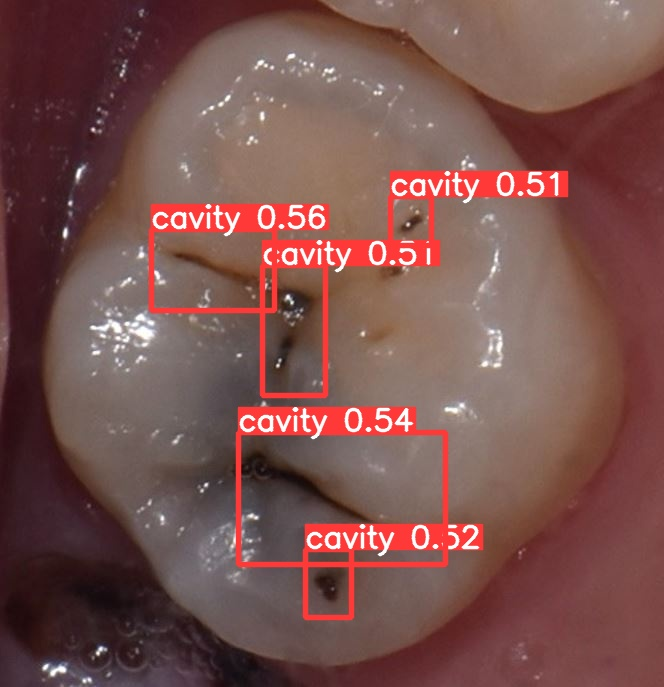

In [15]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Newproject/yolov5/runs/detect/exp13/IMG.JPG')
cv2_imshow(img)

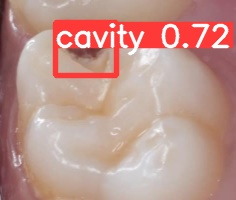

In [16]:
img = cv2.imread('/content/drive/MyDrive/Newproject/yolov5/runs/detect/exp17/break.jpg')
cv2_imshow(img)

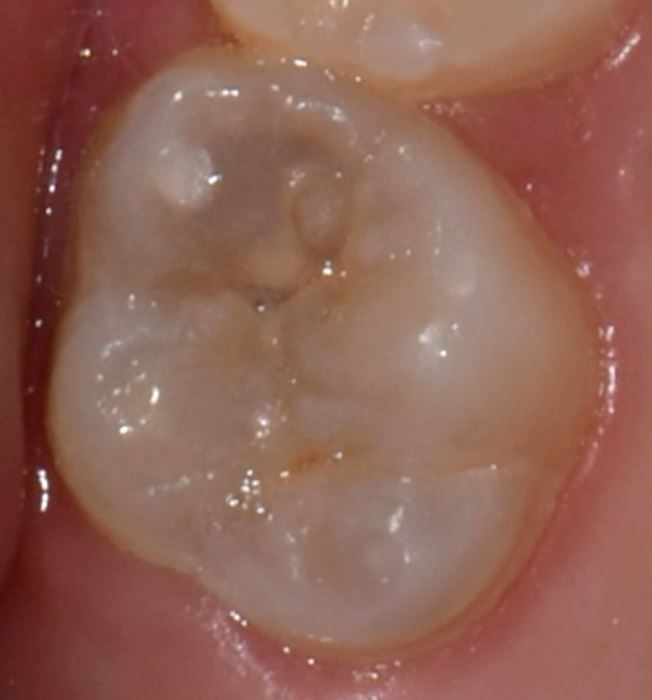

In [19]:
img = cv2.imread('/content/drive/MyDrive/Newproject/yolov5/runs/detect/exp19/chage.jpg')
cv2_imshow(img)

In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/train/train.zip')
zip_file.extractall('/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/train')


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/val/validation.zip')
zip_file.extractall('/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/val')


In [ ]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('./project_bigcustom/train/*.jpg') + glob('./project_bigcustom/train/*.JPG')
valid_img_list = glob('./project_bigcustom/val/*.jpg') + glob('./project_bigcustom/val/*.JPG')


# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')

with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
import yaml

with open('/content/drive/MyDrive/Newproject/yolov5/data/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/train'
data['val'] = '/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/val'

with open('/content/drive/MyDrive/Newproject/yolov5/data/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['cavity'], 'nc': 1, 'train': '/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/train', 'val': '/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/val'}
{'names': ['cavity'], 'nc': 1, 'train': '/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/train', 'val': '/content/drive/MyDrive/Newproject/yolov5/project_bigcustom/val'}


In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data /content/drive/MyDrive/Newproject/yolov5/data/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name results

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/Newproject/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Newproject/yolov5/runs/train/results6/weights/best.pt --img 416 --conf 0.5 --source "/content/drive/MyDrive/Newproject/IMG.JPG"

detect: weights=['/content/drive/MyDrive/Newproject/yolov5/runs/train/results6/weights/best.pt'], source=/content/drive/MyDrive/Newproject/IMG.JPG, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Newproject/IMG.JPG: 416x416 2 cavitys, 7.4ms
Speed: 0.4ms pre-process, 7.4ms inference, 1.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp15


In [20]:
!python detect.py --weights /content/drive/MyDrive/Newproject/yolov5/runs/train/results6/weights/best.pt --img 416 --conf 0.5 --source "/content/drive/MyDrive/Newproject/break.jpg"

detect: weights=['/content/drive/MyDrive/Newproject/yolov5/runs/train/results6/weights/best.pt'], source=/content/drive/MyDrive/Newproject/break.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Newproject/break.jpg: 384x416 1 cavity, 67.8ms
Speed: 0.5ms pre-process, 67.8ms inference, 1.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp20


In [21]:
!python detect.py --weights /content/drive/MyDrive/Newproject/yolov5/runs/train/results6/weights/best.pt --img 416 --conf 0.5 --source "/content/drive/MyDrive/Newproject/chage.jpg"

detect: weights=['/content/drive/MyDrive/Newproject/yolov5/runs/train/results6/weights/best.pt'], source=/content/drive/MyDrive/Newproject/chage.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Newproject/chage.jpg: 416x416 (no detections), 7.4ms
Speed: 0.4ms pre-process, 7.4ms inference, 0.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp21


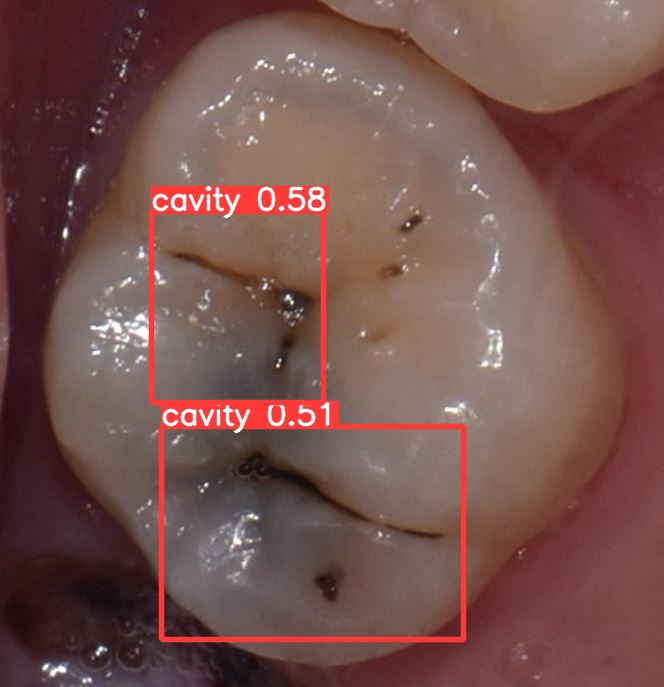

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Newproject/yolov5/runs/detect/exp15/IMG.JPG')
cv2_imshow(img)

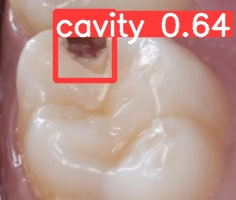

In [22]:
img = cv2.imread('/content/drive/MyDrive/Newproject/yolov5/runs/detect/exp20/break.jpg')
cv2_imshow(img)

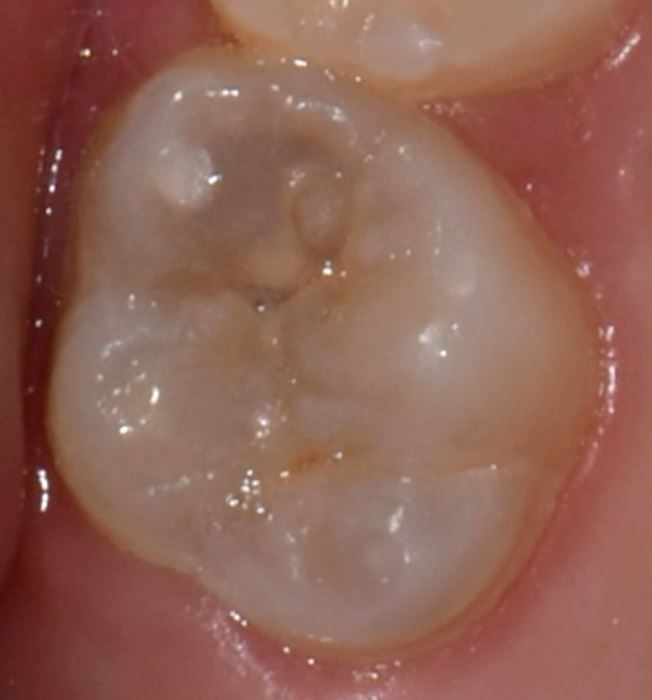

In [23]:
img = cv2.imread('/content/drive/MyDrive/Newproject/yolov5/runs/detect/exp21/chage.jpg')
cv2_imshow(img)